# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Abby Lloyd

### Github Link: https://github.com/abbylloyd03/44620-Module6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1: Article html stored in separate file that is committed and pushed: 1 pt

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
import pickle

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

with open('article_html.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

### Question 2: Article text is correct: 1 pt

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
from bs4 import BeautifulSoup

with open('article_html.pkl', 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, 'html5lib')

article_content = soup.find('article')

print(article_content.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

### Question 3: Correct (or equivalent in the case of multiple tokens with same frequency) tokens printed: 1 pt

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [11]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')
doc = nlp(article_content.get_text())


# Remove whitespace, punctuation, and stopword tokens
# Convert all letters to lowercase

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.lower_ for token in doc if we_care_about(token)]

# Count & print token frequency

word_freq = Counter(map(str,interesting_tokens))
print('Five most frequent tokens:', word_freq.most_common(5))



Five most frequent tokens: [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


### Question 4: Correct (or equivalent in the case of multiple lemmas with same frequency) lemmas printed: 1 pt

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [10]:
# Lemmatization
# Convert all letters to lowercase

interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# Count & print lemma frequency

lemma_freq = Counter(interesting_lemmas)
print('Five most frequent lemmas:', lemma_freq.most_common(5))

Five most frequent lemmas: [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


### Question 5: Correct scores for first sentence printed: 2 pts (1 / function)

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

#### Question 5: Part One

In [5]:
# Define first method (Count interesting tokens in method)

def score_sentence_by_token(sentence, interesting_token):
    unpacked_tokens = set()
    for token, freq in interesting_token:
        unpacked_tokens.add(token)
    count = 0
    for token in sentence:
        if token.lower_ in unpacked_tokens:
            count += 1
    sent_str = str(sentence)
    print('Count of interesting tokens:', count)
    print('Sentence:', sent_str)
    print('List of interesting tokens:', unpacked_tokens)

# Isolate and store first sentence of article

sentences = list(doc.sents)
sentence = sentences[2]

# Use method to return number of interesting tokens in sentence

score_sentence_by_token(sentence, word_freq.most_common(5))


Count of interesting tokens: 2
Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
List of interesting tokens: {'headlight', 'led', 'headlights', 'technology', 'laser'}


#### Question 5: Part Two

In [6]:
# Define second method (Count interesting lemmas in sentence)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    unpacked_lemmas = set()
    for lemma, freq in interesting_lemmas:
        unpacked_lemmas.add(lemma)
    count = 0
    for token in sentence:
        if token.lemma_.lower() in unpacked_lemmas:
            count += 1
    sent_str = str(sentence)
    print('Count of interesting lemmas:', count)
    print('Sentence:', sent_str)
    print('List of interesting lemmas:', unpacked_lemmas)

# Isolate and store first sentence of article

sentences = list(doc.sents)
sentence = sentences[2]

# Use method to return number of interesting lemmas in sentence

score_sentence_by_lemma(sentence, lemma_freq.most_common(5))

Count of interesting lemmas: 2
Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
List of interesting lemmas: {'headlight', 'led', 'beam', 'technology', 'laser'}


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question 6: Histogram shown with appropriate labelling: 1 pt

Text(0, 0.5, 'Frequency')

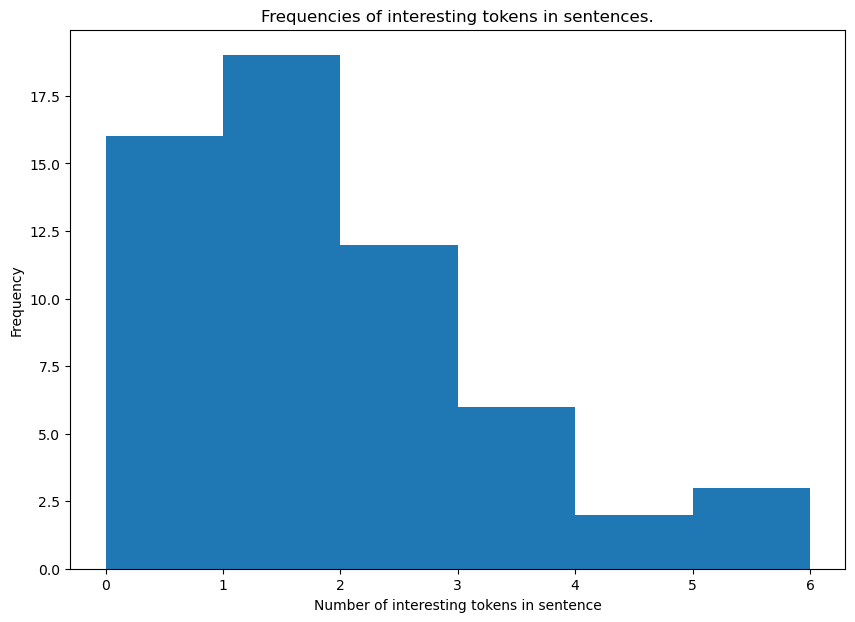

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Make a list of token counts per sentence (x) for histogram

def score_sentence_by_token_for_histogram(sentences, interesting_token):
    list = []
    unpacked_tokens = set()
    for token, freq in interesting_token:
        unpacked_tokens.add(token)
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lower_ in unpacked_tokens:
                count += 1
        list.append(count)
    return list

x = score_sentence_by_token_for_histogram(sentences, word_freq.most_common(5))

# Create plot

fig, ax = plt.subplots(figsize =(10, 7))
n_bins = max(x)
ax.hist(x, n_bins)

# Set title
ax.set_title("Frequencies of interesting tokens in sentences.")
  
# adding labels
ax.set_xlabel('Number of interesting tokens in sentence')
ax.set_ylabel('Frequency')


### Question 6: The most common range of scores 
- It appears that the most common number of interesting tokens per sentence was 1.

### Question 7: Histogram shown with appropriate labelling: 1 pt

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0, 0.5, 'Frequency')

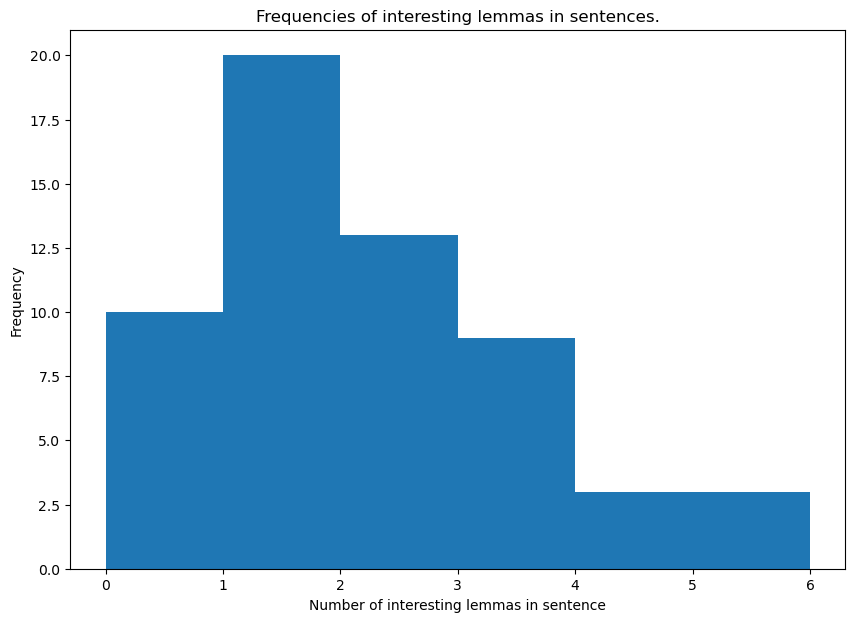

In [8]:
# Make a list of token counts per sentence (x) for histogram

def score_sentence_by_lemma_for_histogram(sentences, interesting_lemmas):
    list = []
    unpacked_lemmas = set()
    for lemma, freq in interesting_lemmas:
        unpacked_lemmas.add(lemma)
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lemma_.lower() in unpacked_lemmas:
                count += 1
        list.append(count)
    return list


x = score_sentence_by_lemma_for_histogram(sentences, lemma_freq.most_common(5))

# Create plot

fig, ax = plt.subplots(figsize =(10, 7))
n_bins = max(x)
ax.hist(x, n_bins)

# Set title
ax.set_title("Frequencies of interesting lemmas in sentences.")
  
# adding labels
ax.set_xlabel('Number of interesting lemmas in sentence')
ax.set_ylabel('Frequency')

### Question 7: The most common range of scores 
- It appears that the most common number of interesting lemmas per sentence was 1.

### Question 8: Thoughtful answer provided: 1 pt

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

- If we only considered nouns as interesting words, the verb 'led' would be eleminated from our previous list of interesting words.
- We could use the Tagger provided by Spacy to do part of speach tagging to isolate only nouns. We would do this at the same time we eliminated stop words.
- An example of how you can use Spacy to isolate nouns is below:

In [9]:
for token in doc:
    if token.pos_ == "NOUN":
        print(token)

Comments
march
technology
headlights
thing
mind
Engines
fuel
efficiency
switch
power
front
mind
thousands
engineers
world
state
art
lighting
day
day
beam
headlights
way
designs
regulations
bulbs
halogens
HIDs
LEDs
technology
scene
lasers
prototype
laser
headlight
assemblies
testing
image
mind
phrase
laser
headlights
laser
beams
front
automobile
beams
light
illumination
spot
distance
eyes
laser
headlights
way
laser
headlights
state
laser
diodes
headlight
lasers
phosphor
LEDs
light
reflectors
headlights
road
headlights
way
benefits
energy
LEDs
amount
light
space
i8
vehicles
laser
headlight
technology
headlights
nascent
technology
vehicles
technology
partnership
lighting
experts
practice
beam
lamp
laser
spot
beams
illumination
meters
vehicle
beams
lights
indium
nitride
diode
lasers
projectors
power
levels
watt
challenges
technology
environment
need
temperature
extremes
research
lasers
laser
pointers
room
temperatures
headlights
degrees
degrees
laser
efficiency
heat
output
things
engineeri